In [9]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">{Melbourne's Liveability Assessment}</div>

<div class="usecase-authors"><b>Authored by: </b> {Steven Nguyen}</div>

<div class="usecase-duration"><b>Duration:</b> {120} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, Data Wrangling, Matplotlib}</div>
</div>

<div class="usecase-section-header">Scenario</div>

**As a council it is important that we're focusing on our residents and ensuring that the City of Melbourne continues to have a high liveability. As such, we are dedicated to looking at the trends in our liveability and reflecting on why certain trends have decreased and why. We endeavour to ensure we know how our liveability is trending and find resolutions to why they are decreasing.**

This project will endeavour to highlight key trends for the City of Melbourne in regards to liveability and ensure that COM remains a highly liveable city and continues to retain its high ranking for liveability internationally. Downwards trends will be further investigated to potentially highlight areas that could be remedied and thus prevent further downwards trend. This will be achieved through looking at COM's *Indicators of Wellbeing by Year* and *Liveability and Social Indicators* datasets.{Using User Story format, write a description of the problem you are trying to solve for this use case.}

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
<ul>
    <li>Learn how to import the datasets into a Pandas dataframe</li>
    <li>Data wrangling with any columns not required and aggregating data</li>
    <li>Learn how to visualise by utilising libraries such as Matplotlib, Seaborn, Geopandas and Folium</li>
</ul>

<h1><div class="usecase-section-header">Introduction</div></h1>

Historically, Melbourne enjoyed the distinction of occupying the foremost position in the Global Liveability Ranking until the year 2018. Nevertheless, in the subsequent years, the city has encountered noteworthy challenges in its quest to regain this prestigious ranking. This particular use case is centered on a comprehensive examination of the dynamic trends pertaining to liveability within Melbourne. Our primary aim is to discern and elucidate the determinants that have hindered Melbourne's endeavor to recapture the coveted number one position in the Global Liveability Ranking.

Our analysis will focus on pivotal domains that significantly contribute to the overall liveability score, encompassing areas such as employment opportunities, food security, acesss to healthcare, safety and security, as well as access to natural amenities. Furthermore, we will delve into the perspectives of Melbourne's residents, seeking insights through the Wellness Survey as an indicator. By juxtaposing these subjective views with objective metrics like the Jobs-to-Housing ratio, we intend to gain a nuanced understanding of the facets of liveability that warrant attention and potential enhancement.

**Datasets List**
<ol>
<li>Indicators of Wellbeing by Year Future Melbourne</li>
<li>City of Melbourne Liveability and Social Indicators</li>
</ol>

**Contents**
<ol>
<li>Import libraries</li>
<li>Analysis</li>
2.1. Access to Jobs <br>
2.2. Healthcare<br>
2.3. Food <br>
2.4. Community Connectedness<br>
2.5. Safety<br>
2.6. Dwelling Density<br>
<li>Findings & Discussion</li>
<li>Conclusion</li>
</ol>

Firstly, we'll import the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.linear_model import LinearRegression
import matplotlib.dates as dates
import folium
import matplotlib.dates as mdates
import seaborn as sns
plt.style.use('ggplot')


We'll then be importing the 2 datasets that we'll be looking at.
1. Indicators of Wellbeing by Year Future Melbourne
2. City of Melbourne Liveability and Social Indicators

In [2]:
#https://data.melbourne.vic.gov.au/explore/dataset/indicators-of-wellbeing-by-year-future-melbourne/table/
ind_wellbeing = pd.read_csv("https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/indicators-of-wellbeing-by-year-future-melbourne/exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=true",delimiter=";")

#https://data.melbourne.vic.gov.au/explore/dataset/city-of-melbourne-liveability-and-social-indicators/information/
liveability_df = pd.read_csv("https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/city-of-melbourne-liveability-and-social-indicators/exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=true",delimiter=";")

Let us briefly look into both datasets to get a general understanding of them

In [3]:
#print the head of the dataframe indicators of wellbeing dataset 
ind_wellbeing.head()

,indicator_label,indicator_description,unit,2012,2013,2014,2015,2016,population,source
0,Health,How satisfied people feel with their health (a...,%,77.9,78.9,78.4,77.2,78.6,Resident,Future Melbourne Social Survey
1,Currently achieving in life,How satisfied people feel with what people are...,%,73.5,74.8,74.3,74.6,75.1,Resident,Future Melbourne Social Survey
2,Personal relationships (Male),How satisfied people feel with their personal ...,%,76.2,78.4,81.6,78.1,77.4,Resident,Future Melbourne Social Survey
3,Community connectedness,How satisfied people are with feeling part of ...,%,67.4,68.4,70.4,70.7,68.9,Resident,Future Melbourne Social Survey
4,Community connectedness (Male),How satisfied people are with feeling part of ...,%,66.9,69.1,69.5,70.6,67.6,Resident,Future Melbourne Social Survey


In [4]:
#print the columns names for the dataframe indicators of wellbeing dataset 
ind_wellbeing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   indicator_label        88 non-null     object 
 1   indicator_description  88 non-null     object 
 2   unit                   88 non-null     object 
 3   2012                   65 non-null     float64
 4   2013                   65 non-null     float64
 5   2014                   88 non-null     float64
 6   2015                   88 non-null     float64
 7   2016                   88 non-null     float64
 8   population             88 non-null     object 
 9   source                 88 non-null     object 
dtypes: float64(5), object(5)
memory usage: 7.0+ KB


In [5]:
#print the head of the dataframe for the Liveability and Social indicator dataset
liveability_df.head()

,type,topic,id,indicator,period,numerator,denominator,value,value_type,sources
0,Liveability,Economy,ECO_1,City's unemployment rate,2015 (June Qtr),"3,942","84,942",4.64,Percentage,Australian Government Department of Employment...
1,Liveability,Economy,ECO_2,Assessed value of commercial and industrial pr...,2015 (at 30 June),"48,331,069,777.00","101,671,404,180.00",47.54,Percentage,"City of Melbourne, Property Services, 2015-2018"
2,Liveability,Economy,ECO_3,Percentage of city population living in poverty,2015,"13,177","136,872",9.63,Percentage,"Geografia, Relative Poverty and Employment Mea..."
3,Liveability,Economy,ECO_4,Percentage of persons (city population) in ful...,2017 (June Qtr),"68,722","159,141",43.18,Percentage,"Geografia, Relative Poverty and Employment Mea..."
4,Liveability,Economy,ECO_4,Percentage of persons (city population) in ful...,2014 (June Qtr),"55,359","127,975",43.26,Percentage,"Geografia, Relative Poverty and Employment Mea..."


In [6]:
#print the column names of the dataframe for the Liveability and Social indicator dataset
liveability_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   type         319 non-null    object 
 1   topic        319 non-null    object 
 2   id           319 non-null    object 
 3   indicator    319 non-null    object 
 4   period       319 non-null    object 
 5   numerator    217 non-null    object 
 6   denominator  294 non-null    object 
 7   value        318 non-null    float64
 8   value_type   319 non-null    object 
 9   sources      319 non-null    object 
dtypes: float64(1), object(9)
memory usage: 25.0+ KB


In [7]:
#removes any strings after the year and converts to datetime
def remove_qtr(indicator):
    indicator['period'] = indicator['period'].str.replace(r'\s+\(.*\)', '')
    indicator['period'] = pd.to_datetime(indicator['period'], format='%Y')
    
#selects for the indicator and sorts the values by period

In [8]:
def remove_yr(indicator):
    indicator['period'] = indicator['period'].str.replace(r'\/\d{2}', '', regex=True)
    indicator['period'] = pd.to_datetime(indicator['period'], format='%Y')

In [ ]:
def remove_FY(indicator):
    # Use str.replace to remove "FY " and "/15" and store the result in a new column
    indicator['period'] = indicator['period'].str.replace(r'FY |/\d{2}', '')
    indicator['period'] = pd.to_datetime(indicator['period'], format='%Y')

In [15]:
def datetime_to_float(indicator):
    #convert to datetime
    indicator['Year'] = pd.to_datetime(indicator['Year'], format='%Y')
    #change date column to year
    indicator['Year'] = indicator['Year'].dt.strftime('%Y')
    #convert value column from object to float
    indicator['Value'] = pd.to_numeric(indicator['Value'], errors='coerce')
    return indicator

<h1>1. Access to Jobs</h1>

House/jobs ratio <br>
City's unemployment rate<br>
Youth unemployment rate<br>

In [9]:
#REC_5 = Jobs/House Ratio
REC_5 = liveability_df[liveability_df["id"] == "REC_5"]
#sort the datetime by ascending
REC_5 = REC_5.sort_values(by=["period"])
#remove /15 from year
remove_yr(REC_5)
#convert to datetime
REC_5['period'] = pd.to_datetime(REC_5['period'])
#convert to datetime
#REC_5['period'].index.to_pydatetime()


#ECO_1 = City's unemployment rate
ECO_1 = liveability_df[liveability_df["id"] == "ECO_1"]
#sort the datetime by ascending
ECO_1 = ECO_1.sort_values(by=["period"])
#remove June Qtr from year
remove_qtr(ECO_1)
#convert to datetime
ECO_1['period'] = pd.to_datetime(ECO_1['period'])


#ECO_5 = Youth unemployment rate
ECO_5 = liveability_df[liveability_df["id"] == "ECO_5"]
#sort the datetime by ascending
ECO_5 = ECO_5.sort_values(by=["period"])
#remove June Qtr from year
remove_qtr(ECO_5)
#convert to datetime
ECO_5['period'] = pd.to_datetime(ECO_5['period'])

#ECO_3 = % of city's population living in poverty
ECO_3 = liveability_df[liveability_df["id"] == "ECO_3"]
ECO_3 = ECO_3.sort_values(by=["period"])

/var/folders/wh/9bdzvvg11zqf7g24mhhw2dq40000gn/T/ipykernel_96471/1129035972.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  indicator['period'] = indicator['period'].str.replace(r'\s+\(.*\)', '')
/var/folders/wh/9bdzvvg11zqf7g24mhhw2dq40000gn/T/ipykernel_96471/1129035972.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  indicator['period'] = indicator['period'].str.replace(r'\s+\(.*\)', '')


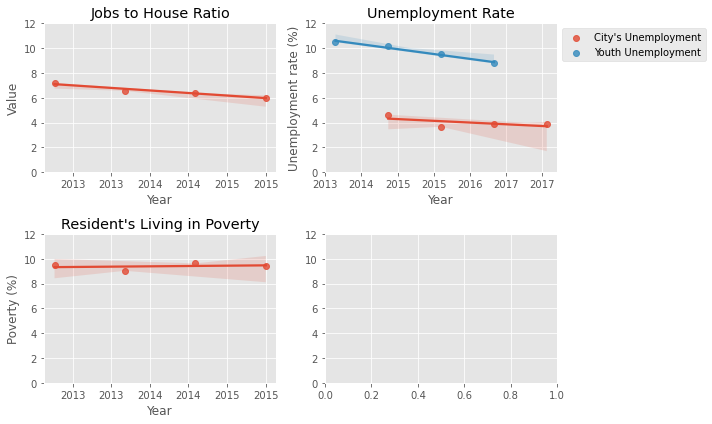

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Set the same y-axis limits for all subplots
y_min, y_max = 0, 12
for i, ax in enumerate(axes[:3].flat):
    ax.set_ylim(y_min, y_max)

#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(REC_5['period']), y=REC_5['value'],ax=axes[0,0])
#change date format to year
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[0,0].xaxis.set_major_formatter(date_format)
axes[0,0].set_title("Jobs to House Ratio")
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Value')


sns.regplot(x=mdates.date2num(ECO_1['period']), y=ECO_1['value'],ax=axes[0,1],label="City's Unemployment")
sns.regplot(x=mdates.date2num(ECO_5['period']), y=ECO_5['value'],ax=axes[0,1],label="Youth Unemployment")
#change date format to year
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[0,1].xaxis.set_major_formatter(date_format)
axes[0,1].set_title("Unemployment Rate")
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Unemployment rate (%)')
axes[0,1].legend(bbox_to_anchor=(1, 1))


sns.regplot(x=mdates.date2num(ECO_3['period']), y=ECO_3['value'],ax=axes[1,0],label="Resident's Living in Poverty")
#change date format to year
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[1,0].xaxis.set_major_formatter(date_format)
axes[1,0].set_title("Resident's Living in Poverty")
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Poverty (%)')
# Adjust layout spacing between subplots
plt.tight_layout()
#show plot
plt.show()

<h4>Jobs to House Ratio:</h4>
The observed decline in the Jobs-to-House ratio suggests a positive trend, as lower ratios are generally desirable. However, it is noteworthy that, as of 2015, the Jobs-to-House ratio remains considerably high, reaching approximately 6. This high ratio indicates a significant number of workers commuting to urban centers, which can result in increased congestion and commuting times.

<h4>Unemployment Rate:</h4>
The current unemployment rate, standing at approximately 4%, aligns well with Australia's targeted unemployment range of 3.5% to 4.5%. Notably, there is a discernible downward trend in Youth Unemployment (age 15-24), which is a positive development. In 2017, Australia faced a notable challenge with a youth unemployment rate of around 14%. Consequently, Melbourne's current youth unemployment rate, hovering at approximately 9%, is a favorable indicator, reflecting an improvement in employment opportunities for the younger demographic.

<h4>Resident's Living in Poverty</h4>
The rate of poverty among residents in the City of Melbourne has demonstrated a persistent stability, hovering at approximately 9.5%. Ideally, we would observe a downward trajectory in this figure. Presently, it is worth noting that the City of Melbourne has not met the poverty reduction target set by the United Nations' Sustainable Development Goals, which aims for a poverty rate of 8.7%, as of the year 2017. Addressing this challenge and working towards achieving the UN's target should remain a priority for the city.


<h1>2. Access to Healthcare</h1>

In [10]:
health_df = ind_wellbeing[ind_wellbeing["indicator_label"] == "Health"]
quality_male = ind_wellbeing[ind_wellbeing["indicator_label"] == "Quality of life (Male)"]
quality_female = ind_wellbeing[ind_wellbeing["indicator_label"] == "Quality of life (Female)"]

In [11]:
#Number of physicians per 100,000
HEA_2 = liveability_df[liveability_df["id"] == "HEA_2"]
HEA_2 = HEA_2.sort_values(by=["period"])

#Number of nursing and midwifery per 100,000
HEA_4 = liveability_df[liveability_df["id"] == "HEA_4"]
HEA_4 = HEA_4.sort_values(by=["period"])

#Number of mental health practitioners per 100,000
HEA_5 = liveability_df[liveability_df["id"] == "HEA_5"]
HEA_5 = HEA_5.sort_values(by=["period"])

#Total population of city
PROP_1 = liveability_df[liveability_df["id"] == "PROP_1"]
PROP_1 = PROP_1.sort_values(by=["period"])

In [12]:
quality_male = pd.melt(quality_male, id_vars=['indicator_label'],var_name='Year',value_name="Value")
quality_male = quality_male.loc[2:6]

health_df = pd.melt(health_df, id_vars=['indicator_label'],var_name='Year',value_name="Value")
health_df = health_df.loc[2:6]

quality_female = pd.melt(quality_female, id_vars=['indicator_label'],var_name='Year',value_name="Value")
quality_female = quality_female.loc[2:6]

health_df['Year'] = pd.to_datetime(health_df['Year'], format='%Y')
health_df['Year'] = health_df['Year'].dt.strftime('%Y')

#convert value to float
#health_df['Value'] = pd.to_numeric(health_df['Value'], errors='coerce')
#quality_male['Value'] = pd.to_numeric(quality_male['Value'], errors='coerce')
#quality_female['Value'] = pd.to_numeric(quality_female['Value'], errors='coerce')
health_df = datetime_to_float(health_df)
quality_male = datetime_to_float(quality_male)
quality_female = datetime_to_float(quality_female)

In [13]:
#remove the June qtr from year
remove_qtr(PROP_1)
# Convert the date_column to datetime
PROP_1['period'] = pd.to_datetime(PROP_1['period'])
# Extract the year and create a new column
PROP_1['period'] = PROP_1['period'].dt.year
# Filter for years 2015-2017
PROP_1_year = PROP_1[(PROP_1['period'] >= 2015) & (PROP_1['period'] <= 2017)]
# Select 'period' and 'value' columns
PROP_1_year = PROP_1_year[['period', 'value']]

# Convert the date_column to datetime
HEA_2['period'] = pd.to_datetime(HEA_2['period'])
# Extract the year and create a new column
HEA_2['period'] = HEA_2['period'].dt.year
# Filter for years 2015-2017
HEA_2_year = HEA_2[(HEA_2['period'] >= 2015) & (HEA_2['period'] <= 2017)]
# Select 'period' and 'value' columns
HEA_2_year = HEA_2_year[['period', 'value']]

# Convert the date_column to datetime
HEA_4['period'] = pd.to_datetime(HEA_4['period'])
# Extract the year and create a new column
HEA_4['period'] = HEA_4['period'].dt.year
# Filter for years 2015-2017
HEA_4_year = HEA_4[(HEA_4['period'] >= 2015) & (HEA_4['period'] <= 2017)]
# Select 'period' and 'value' columns
HEA_4_year = HEA_4_year[['period', 'value']]

# Convert the date_column to datetime
HEA_5['period'] = pd.to_datetime(HEA_5['period'])
# Extract the year and create a new column
HEA_5['period'] = HEA_5['period'].dt.year
# Filter for years 2015-2017
HEA_5_year = HEA_5[(HEA_5['period'] >= 2015) & (HEA_5['period'] <= 2017)]
# Select 'period' and 'value' columns
HEA_5_year = HEA_5_year[['period', 'value']]

/var/folders/wh/9bdzvvg11zqf7g24mhhw2dq40000gn/T/ipykernel_94698/1129035972.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  indicator['period'] = indicator['period'].str.replace(r'\s+\(.*\)', '')


In [14]:
def conc_average(df1,df2):
    # Merge the two DataFrames based on the "year" column
    merged_df = pd.merge(df1, df2, on='period', suffixes=('_df1', '_df2'))

    # Perform the division of values
    merged_df['result'] = merged_df['value_df1'] / merged_df['value_df2']

    # Select only the "year" and "result" columns
    result = merged_df[['period', 'result']]
    return result


In [15]:
physician_pop_ratio = conc_average(PROP_1_year,HEA_2_year)
nursing_pop_ratio = conc_average(PROP_1_year,HEA_4_year)
mental_pop_ratio = conc_average(PROP_1_year,HEA_5_year)

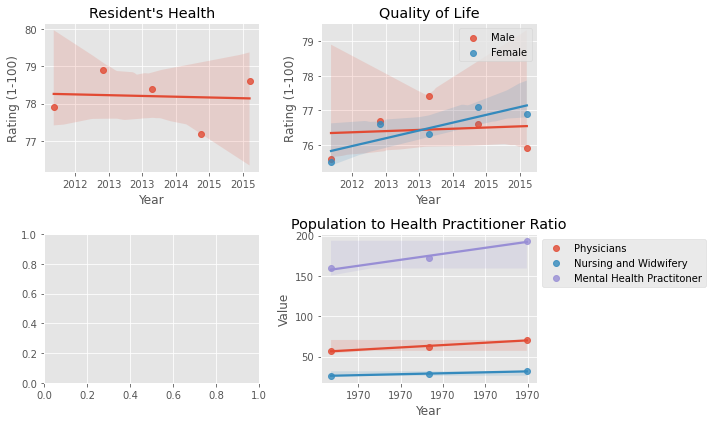

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(health_df['Year']), y=health_df['Value'],ax=axes[0,0],label="Physicians")
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[0,0].xaxis.set_major_formatter(date_format)
axes[0,0].set_title("Resident's Health")
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('%')


sns.regplot(x=mdates.date2num(quality_male['Year']), y=quality_male['Value'],ax=axes[0,1],label="Male")
sns.regplot(x=mdates.date2num(quality_female['Year']), y=quality_female['Value'],ax=axes[0,1],label="Female")
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[0,1].xaxis.set_major_formatter(date_format)
axes[0,1].set_title("Quality of Life")
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('%')
axes[0,1].legend(bbox_to_anchor=(1, 1))


sns.regplot(x=mdates.date2num(physician_pop_ratio['period']), y=physician_pop_ratio['result'],ax=axes[1,1],label="Physicians")
sns.regplot(x=mdates.date2num(nursing_pop_ratio['period']), y=nursing_pop_ratio['result'],ax=axes[1,1],label="Nursing and Widwifery")
sns.regplot(x=mdates.date2num(mental_pop_ratio['period']), y=mental_pop_ratio['result'],ax=axes[1,1],label="Mental Health Practitoner")
#change date format to year
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[1,1].xaxis.set_major_formatter(date_format)
axes[1,1].set_title("Population to Health Practitioner Ratio")
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Value')
axes[1,1].legend(bbox_to_anchor=(1, 1))
# Adjust layout spacing between subplots
plt.tight_layout()
#show plot
plt.show()

<h1>3. Food Security</h1>

In [9]:
food_male = ind_wellbeing[ind_wellbeing["indicator_label"] == "Food security - running out (Male)"]
food_female = ind_wellbeing[ind_wellbeing["indicator_label"] == "Food security - running out (Female)"]

food_18 = ind_wellbeing[ind_wellbeing["indicator_label"] == "Food security - running out (18-35 yrs)"]
food_36 = ind_wellbeing[ind_wellbeing["indicator_label"] == "Food security - running out (36 yrs and over)"]

food_male = pd.melt(food_male, id_vars=['indicator_label'],var_name='Year',value_name="Value")
food_male = food_male.loc[2:6]

food_female = pd.melt(food_female, id_vars=['indicator_label'],var_name='Year',value_name="Value")
food_female = food_female.loc[2:6]

food_18 = pd.melt(food_18, id_vars=['indicator_label'],var_name='Year',value_name="Value")
food_18 = food_18.loc[2:6]

food_36 = pd.melt(food_36, id_vars=['indicator_label'],var_name='Year',value_name="Value")
food_36 = food_36.loc[2:6]

#convert value to float
#food_male['Value'] = pd.to_numeric(food_male['Value'], errors='coerce')
#food_female['Value'] = pd.to_numeric(food_female['Value'], errors='coerce')
#food_18['Value'] = pd.to_numeric(food_18['Value'], errors='coerce')
#food_36['Value'] = pd.to_numeric(food_36['Value'], errors='coerce')
food_male = datetime_to_float(food_male)
food_female = datetime_to_float(food_female)
food_18 = datetime_to_float(food_18)
food_36 = datetime_to_float(food_36)

In [10]:
FOOD_1 = liveability_df[liveability_df["id"] == "FOOD_1"]
FOOD_1 = FOOD_1.sort_values(by=["period"])

FOOD_2 = liveability_df[liveability_df["id"] == "FOOD_2"]
FOOD_2 = FOOD_2.sort_values(by=["period"])

FOOD_3 = liveability_df[liveability_df["id"] == "FOOD_3"]
FOOD_3 = FOOD_3.sort_values(by=["period"])

FOOD_4 = liveability_df[liveability_df["id"] == "FOOD_4"]
FOOD_4 = FOOD_4.sort_values(by=["period"])

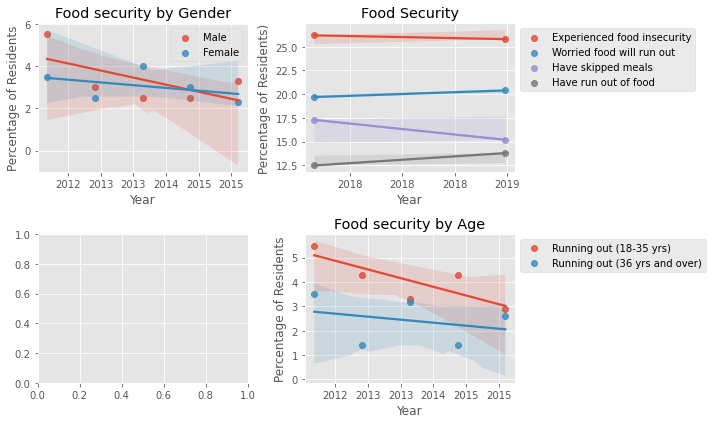

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(food_male['Year']), y=food_male['Value'],ax=axes[0,0],label="Male")
sns.regplot(x=mdates.date2num(food_female['Year']), y=food_female['Value'],ax=axes[0,0],label="Female")
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[0,0].xaxis.set_major_formatter(date_format)
axes[0,0].set_title("Food security by Gender")
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('%')
axes[0,0].legend(bbox_to_anchor=(1, 1))

#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(FOOD_1['period']), y=FOOD_1['value'],ax=axes[0,1],label="Experienced food insecurity")
sns.regplot(x=mdates.date2num(FOOD_2['period']), y=FOOD_2['value'],ax=axes[0,1],label="Worried food will run out")
sns.regplot(x=mdates.date2num(FOOD_3['period']), y=FOOD_3['value'],ax=axes[0,1],label="Have skipped meals")
sns.regplot(x=mdates.date2num(FOOD_4['period']), y=FOOD_4['value'],ax=axes[0,1],label="Have run out of food")
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[0,1].xaxis.set_major_formatter(date_format)
axes[0,1].set_title("Food Security")
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('%')
axes[0,1].legend(bbox_to_anchor=(1, 1))


sns.regplot(x=mdates.date2num(food_18['Year']), y=food_18['Value'],ax=axes[1,1],label="Running out (18-35 yrs)")
sns.regplot(x=mdates.date2num(food_36['Year']), y=food_36['Value'],ax=axes[1,1],label="Running out (36 yrs and over)")
#change date format to year
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[1,1].xaxis.set_major_formatter(date_format)
axes[1,1].set_title("Food security by Age")
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('%')
axes[1,1].legend(bbox_to_anchor=(1, 1))
# Adjust layout spacing between subplots
plt.tight_layout()
#show plot
plt.show()

<h1>4. Community connectedness</h1>

In [9]:
comm_total = ind_wellbeing[ind_wellbeing["indicator_label"] == "Community connectedness"]
comm_male = ind_wellbeing[ind_wellbeing["indicator_label"] == "Community connectedness (Male)"]
comm_female = ind_wellbeing[ind_wellbeing["indicator_label"] == "Community connectedness (Female)"]

comm_18_35 = ind_wellbeing[ind_wellbeing["indicator_label"] == "Community connectedness (18-35 yrs)"]
comm_36= ind_wellbeing[ind_wellbeing["indicator_label"] == "Community connectedness (36 yrs and over)"]

In [10]:
comm_total = pd.melt(comm_total, id_vars=['indicator_label'],var_name='Year',value_name="Value")
comm_total = comm_total.loc[2:6]

comm_male = pd.melt(comm_male, id_vars=['indicator_label'],var_name='Year',value_name="Value")
comm_male = comm_male.loc[2:6]

comm_female = pd.melt(comm_female, id_vars=['indicator_label'],var_name='Year',value_name="Value")
comm_female = comm_female.loc[2:6]

comm_18_35 = pd.melt(comm_18_35, id_vars=['indicator_label'],var_name='Year',value_name="Value")
comm_18_35 = comm_18_35.loc[2:6]

comm_36 = pd.melt(comm_36, id_vars=['indicator_label'],var_name='Year',value_name="Value")
comm_36 = comm_36.loc[2:6]


#comm_18_35['Year'] = pd.to_datetime(comm_18_35['Year'], format='%Y')
#comm_18_35['Year'] = comm_18_35['Year'].dt.strftime('%Y')

#comm_36['Year'] = pd.to_datetime(comm_36['Year'], format='%Y')
#comm_36['Year'] = comm_36['Year'].dt.strftime('%Y')

#comm_total['Year'] = pd.to_datetime(comm_total['Year'], format='%Y')
#convert value to float
#comm_total['Value'] = pd.to_numeric(comm_total['Value'], errors='coerce')
#comm_male['Value'] = pd.to_numeric(comm_male['Value'], errors='coerce')
#comm_female['Value'] = pd.to_numeric(comm_female['Value'], errors='coerce')
#comm_18_35['Value'] = pd.to_numeric(comm_18_35['Value'], errors='coerce')
#comm_36['Value'] = pd.to_numeric(comm_36['Value'], errors='coerce')

In [ ]:
comm_total = datetime_to_float(comm_total)
comm_male = datetime_to_float(comm_male)
comm_female = datetime_to_float(comm_female)
comm_18_35 = datetime_to_float(comm_18_35)
comm_36 = datetime_to_float(comm_36)


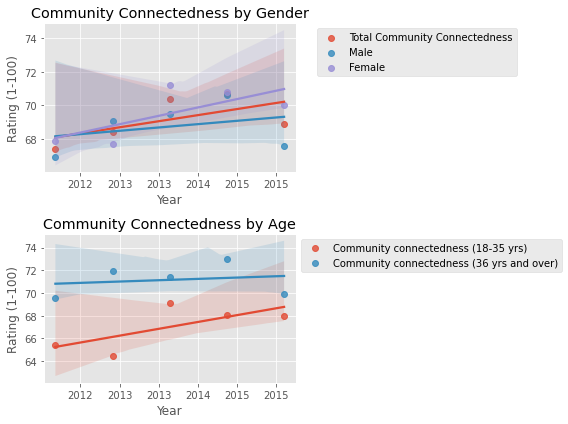

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 6))

#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(comm_total['Year']), y=comm_total['Value'],ax=axes[0],label="Total Community Connectedness")
sns.regplot(x=mdates.date2num(comm_male['Year']), y=comm_male['Value'],ax=axes[0],label="Male")
sns.regplot(x=mdates.date2num(comm_female['Year']), y=comm_female['Value'],ax=axes[0],label="Female")
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[0].xaxis.set_major_formatter(date_format)
axes[0].set_title("Community Connectedness by Gender")
axes[0].set_xlabel('Year')
axes[0].set_ylabel('%')
axes[0].legend(bbox_to_anchor=(1.9, 1))

#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(comm_18_35["Year"]), y=comm_18_35["Value"],ax=axes[1],label="Community connectedness (18-35 yrs)")
sns.regplot(x=mdates.date2num(comm_36["Year"]), y=comm_36["Value"],ax=axes[1],label="Community connectedness (36 yrs and over)")
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[1].xaxis.set_major_formatter(date_format)
axes[1].set_title("Community Connectedness by Age")
axes[1].set_xlabel('Year')
axes[1].set_ylabel('%')
axes[1].legend(bbox_to_anchor=(1, 1))

# Adjust layout spacing between subplots
plt.tight_layout()
#show plot
plt.show()

Coool description of what's happening

<h1>5. Safety</h1>

In [11]:
safe_feel = ind_wellbeing[ind_wellbeing["indicator_label"] == "How safe you feel"]
safe_feel = pd.melt(safe_feel, id_vars=['indicator_label'],var_name='Year',value_name="Value")
safe_feel = safe_feel.loc[2:6]
safe_feel = datetime_to_float(safe_feel)

safe_feel_male = ind_wellbeing[ind_wellbeing["indicator_label"] == "How safe you feel (Male)"]
safe_feel_male = pd.melt(safe_feel_male, id_vars=['indicator_label'],var_name='Year',value_name="Value")
safe_feel_male = safe_feel_male.loc[2:6]
safe_feel_male = datetime_to_float(safe_feel_male)

safe_feel_female = ind_wellbeing[ind_wellbeing["indicator_label"] == "How safe you feel (Female)"]
safe_feel_female = pd.melt(safe_feel_female, id_vars=['indicator_label'],var_name='Year',value_name="Value")
safe_feel_female = safe_feel_female.loc[2:6]
safe_feel_female = datetime_to_float(safe_feel_female)

safe_day_18 = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - daytime (18-39yrs)"]
safe_day_18 = pd.melt(safe_day_18, id_vars=['indicator_label'],var_name='Year',value_name="Value")
safe_day_18 = safe_day_18.loc[2:6]
safe_day_18 = datetime_to_float(safe_day_18)

safe_night_18 = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - night time (18-39yrs)"]
safe_night_18 = pd.melt(safe_night_18, id_vars=['indicator_label'],var_name='Year',value_name="Value")
safe_night_18 = safe_night_18.loc[2:6]
safe_night_18 = datetime_to_float(safe_night_18)

safe_day_40 = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - daytime (40 yrs and over)"]
safe_day_40 = pd.melt(safe_day_40, id_vars=['indicator_label'],var_name='Year',value_name="Value")
safe_day_40 = safe_day_40.loc[2:6]
safe_day_40 = datetime_to_float(safe_day_40)

safe_night_40 = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - night time (40 yrs and over)"]
safe_night_40 = pd.melt(safe_night_40, id_vars=['indicator_label'],var_name='Year',value_name="Value")
safe_night_40 = safe_night_40.loc[2:6]
safe_night_40 = datetime_to_float(safe_night_40)

safe_day_female = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - daytime (Female)"]
safe_day_female = pd.melt(safe_day_female, id_vars=['indicator_label'],var_name='Year',value_name="Value")
safe_day_female = safe_day_female.loc[2:6]
safe_day_female = datetime_to_float(safe_day_female)

safe_night_female = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - night time (Female)"]
safe_night_female = pd.melt(safe_night_female, id_vars=['indicator_label'],var_name='Year',value_name="Value")
safe_night_female = safe_night_female.loc[2:6]
safe_night_female = datetime_to_float(safe_night_female)

safe_day_male = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - daytime (Male)"]
safe_day_male = pd.melt(safe_day_male, id_vars=['indicator_label'],var_name='Year',value_name="Value")
safe_day_male = safe_day_male.loc[2:6]
safe_day_male = datetime_to_float(safe_day_male)

safe_night_male = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - night time (Male)"]
safe_night_male = pd.melt(safe_night_male, id_vars=['indicator_label'],var_name='Year',value_name="Value")
safe_night_male = safe_night_male.loc[2:6]
safe_night_male = datetime_to_float(safe_night_male)

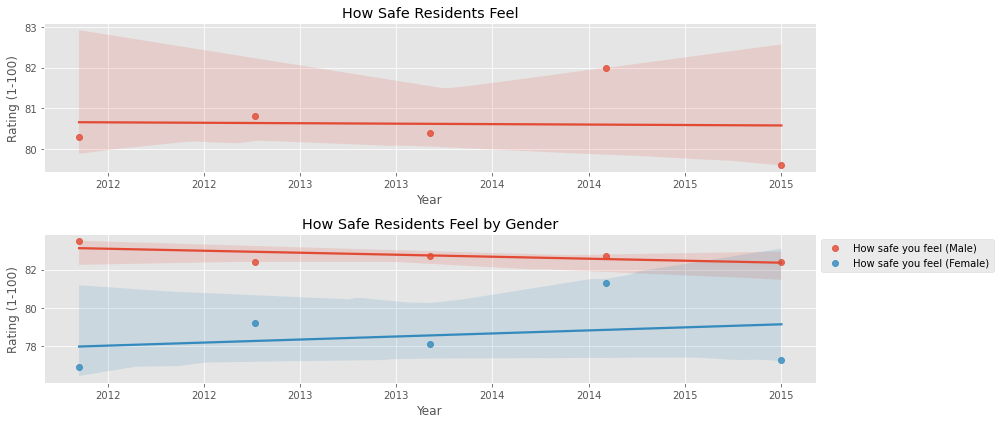

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 6))

#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(safe_feel['Year']), y=safe_feel['Value'],ax=axes[0],label="How safe you feel")
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[0].xaxis.set_major_formatter(date_format)
axes[0].set_title("How Safe Residents Feel")
axes[0].set_xlabel('Year')
axes[0].set_ylabel('%')

#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(safe_feel_male["Year"]), y=safe_feel_male["Value"],ax=axes[1],label="How safe you feel (Male)")
sns.regplot(x=mdates.date2num(safe_feel_female["Year"]), y=safe_feel_female["Value"],ax=axes[1],label="How safe you feel (Female)")
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[1].xaxis.set_major_formatter(date_format)
axes[1].set_title("How Safe Residents Feel by Gender")
axes[1].set_xlabel('Year')
axes[1].set_ylabel('%')
axes[1].legend(bbox_to_anchor=(1, 1))

# Adjust layout spacing between subplots
plt.tight_layout()
#show plot
plt.show()

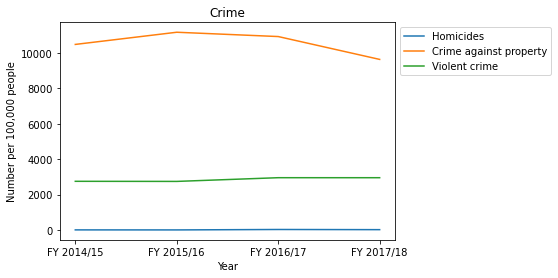

In [ ]:
FIRE_4 = liveability_df[liveability_df["id"] == "FIRE_4"]
FIRE_4 = FIRE_4.sort_values(by=["period"])

FIRE_5 = liveability_df[liveability_df["id"] == "FIRE_5"]
FIRE_5 = FIRE_5.sort_values(by=["period"])

FIRE_6 = liveability_df[liveability_df["id"] == "FIRE_6"]
FIRE_6 = FIRE_6.sort_values(by=["period"])

plt.plot(FIRE_4["period"],FIRE_4["value"], label= 'Homicides')
plt.plot(FIRE_5["period"],FIRE_5["value"], label= "Crime against property")
plt.plot(FIRE_6["period"],FIRE_6["value"], label= "Violent crime")
plt.title("Crime")
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Year")
plt.ylabel("Number per 100,000 people")
plt.show()

In [ ]:
safe_day_18 = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - daytime (18-39yrs)"]
safe_day_18 = pd.melt(safe_day_18, id_vars=['indicator_label'],var_name='Year',value_name="Value")
safe_day_18 = safe_day_18.loc[2:6]
safe_day_18 = datetime_to_float(safe_day_18)

safe_night_18 = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - night time (18-39yrs)"]
safe_night_18 = pd.melt(safe_night_18, id_vars=['indicator_label'],var_name='Year',value_name="Value")
safe_night_18 = safe_night_18.loc[2:6]
safe_night_18 = datetime_to_float(safe_night_18)

safe_day_40 = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - daytime (40 yrs and over)"]
safe_day_40 = pd.melt(safe_day_40, id_vars=['indicator_label'],var_name='Year',value_name="Value")
safe_day_40 = safe_day_40.loc[2:6]
safe_day_40 = datetime_to_float(safe_day_40)

safe_night_40 = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - night time (40 yrs and over)"]
safe_night_40 = pd.melt(safe_night_40, id_vars=['indicator_label'],var_name='Year',value_name="Value")
safe_night_40 = safe_night_40.loc[2:6]
safe_night_40 = datetime_to_float(safe_night_40)

safe_day_female = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - daytime (Female)"]
safe_day_female = pd.melt(safe_day_female, id_vars=['indicator_label'],var_name='Year',value_name="Value")
safe_day_female = safe_day_female.loc[2:6]
safe_day_female = datetime_to_float(safe_day_female)

safe_night_female = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - night time (Female)"]
safe_night_female = pd.melt(safe_night_female, id_vars=['indicator_label'],var_name='Year',value_name="Value")
safe_night_female = safe_night_female.loc[2:6]
safe_night_female = datetime_to_float(safe_night_female)

safe_day_male = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - daytime (Male)"]
safe_day_male = pd.melt(safe_day_male, id_vars=['indicator_label'],var_name='Year',value_name="Value")
safe_day_male = safe_day_male.loc[2:6]
safe_day_male = datetime_to_float(safe_day_male)

safe_night_male = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - night time (Male)"]
safe_night_male = pd.melt(safe_night_male, id_vars=['indicator_label'],var_name='Year',value_name="Value")
safe_night_male = safe_night_male.loc[2:6]
safe_night_male = datetime_to_float(safe_night_male)

<h1>6. Dwelling Density</h1>

Per the Victorian Government's 2019 statement they're aiming to have a dwelling density of 25 dwellings per hectare, which is equivalent to 2500 dwellings per square kilometre. 

Access to schools
Access to childcare
Access to community 
PROH_5 IS DWELLING DENSITY!

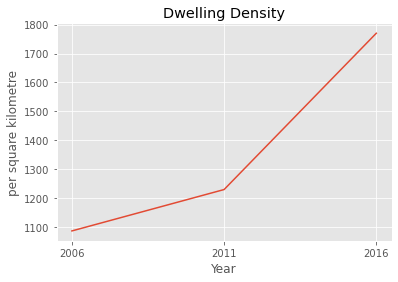

In [21]:

PROH_5 = liveability_df[liveability_df["id"] == "PROH_5"]
PROH_5 = PROH_5.sort_values(by=["period"])

plt.plot(PROH_5["period"],PROH_5["value"])
plt.title("Dwelling Density")
plt.xlabel("Year")
plt.ylabel("per square kilometre")
plt.show()

In [ ]:
#look into dwelling density in relation to amenities such as public recreation, parks, convenience stores etc.
#look into street connectivity with pedestrian road map and sample point, 
#For each sample point, a 1.6km street network buffer was created to represent the local walkable neighbourhood based on the pedestrian road network. 
#This dataset was created by selecting all walkable roads (or parts thereof) within 1.6km network distance of each sample point and buffering these roads by 50m on each side. 
#The resulting dataset was a polygon feature for each sample point.

<h1>Conclusion</h1>

In an optimal scenario, a Jobs-to-House ratio of around 1.5 is considered ideal. Achieving this balance requires strategic approaches, such as relocating job opportunities to suburban areas of Melbourne or augmenting housing options within the city. These measures aim to alleviate the strain on commuting infrastructure, reduce traffic congestion, and enhance overall urban liveability.